# Exploring Protein Image Data

### Kaggle link: 

https://www.kaggle.com/c/human-protein-atlas-image-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Read the Data:

In [2]:
data_filepath = '../protein_data/all/'
df = pd.read_csv(data_filepath + 'train.csv')
df.shape

(31072, 2)

In [3]:
df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


# Looking at the Images:

In [4]:
from IPython.display import Image

Looking at versions of this image:

In [5]:
df.iloc[1,:]

Id        000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
Target                                 7 1 2 0
Name: 1, dtype: object

### Taking a Quick Look:

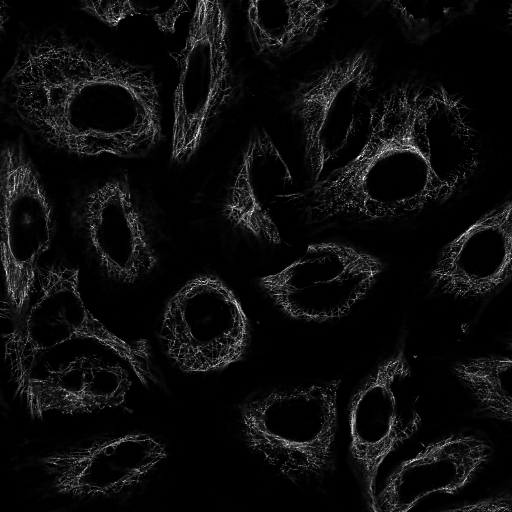

In [6]:
Image(filename='../protein_data/all/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png', width=300, height=300) 

### Plotting Each RGBY Color:

In [7]:
from skimage.io import imread, imshow

In [149]:
def rgby_plots(img_id):
    img_path = '../protein_data/all/train/' + img_id

    # Instantiate plot
    f,ax = plt.subplots(nrows=1, ncols=4, figsize=(40,40))

    i = 0

    # List of color maps for plots
    c_map = ['Reds', 'Greens', 'Blues', 'Oranges']

    for color in ['red', 'green', 'blue', 'yellow']: # For each RGBY version of the image

        # Read in images
        img = imread(img_path + "_" + color + ".png")

        # Subplots
        ax[i].imshow(img, cmap=c_map[i])
        ax[i].set_title(color.capitalize(), fontsize=30)

        i += 1 # count subplots

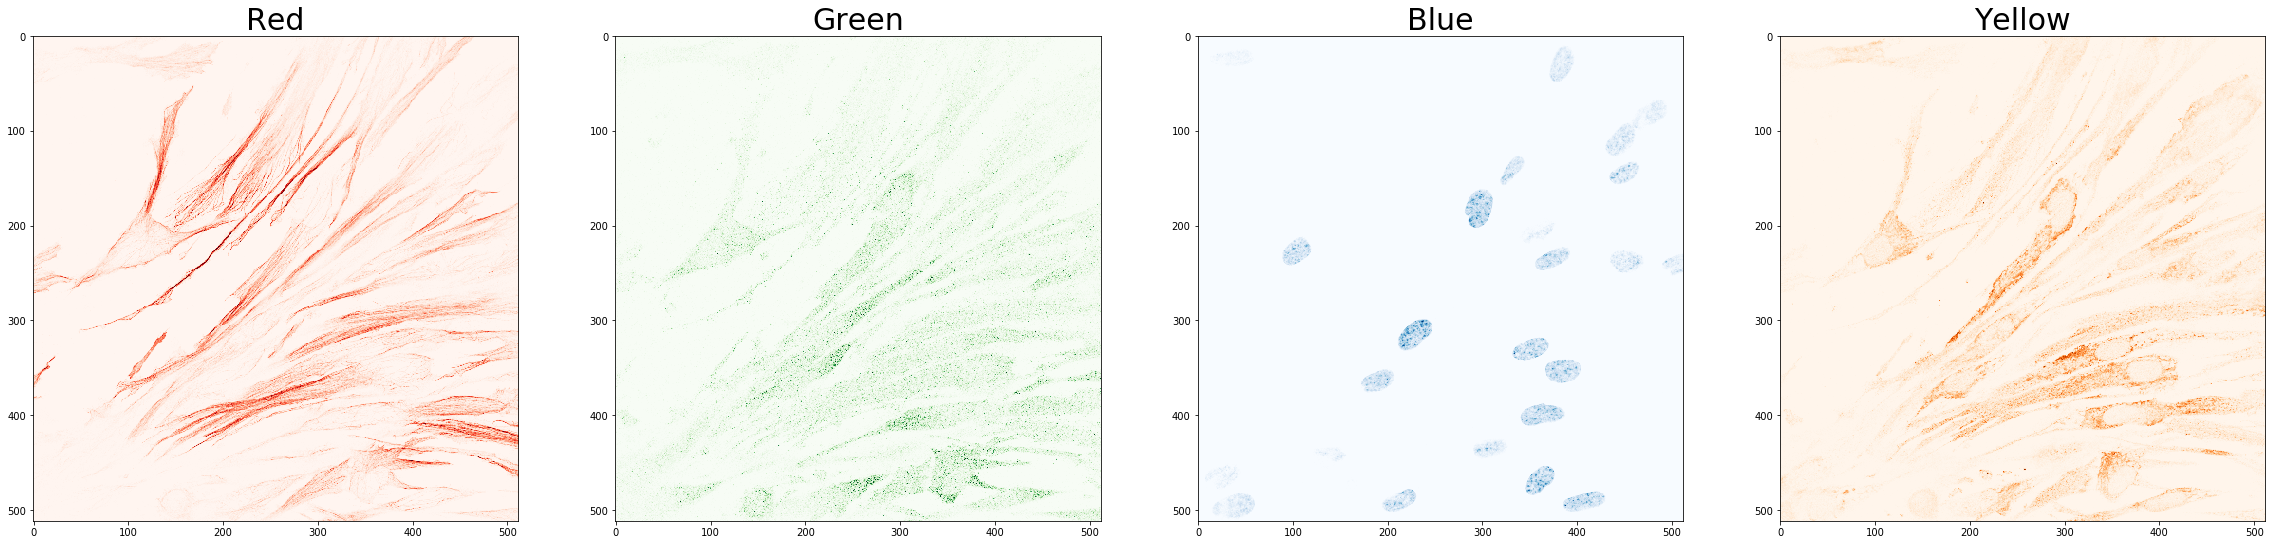

In [150]:
# Get image id from df
img_id = df['Id'][80]

# Call plotting function
rgby_plots(img_id)

### Turning RGBY Images into RGB Arrays:

In [9]:
import imageio

In [103]:
def make_rgb_array(im_id):
# This function takes in the id of an image and returns a RGB np array from all the RGBY color version

    # create an empty array to fill with images
    rgb = np.empty((512, 512, 3))

    i = 0

    # Open each RGB color into a single np array
    for color in ['red', 'green', 'blue']:
        rgb[:,:,i] = imageio.imread('../protein_data/all/train/'+im_id+'_'+color+'.png')
        i += 1

    # Open the yellow layer separately
    yellow = imageio.imread('../protein_data/all/train/'+im_id+'_yellow.png')

    # Adding yellow to red and green to convert image to RGB instead of RGBY
    rgb[:,:,0] += yellow/2 # adding to red layer
    rgb[:,:,1] += yellow/2 # adding to green layer

    # Normalize pixel values
    rgb = rgb / rgb.max() * 255

    # Convert to uint8 type
    rgb = rgb.astype(np.uint8)
    
    return rgb

In [153]:
# get im_id from 'Id' column of df
im_id = df['Id'][95]

# call function for this im_id
rgb = make_rgb_array(im_id)

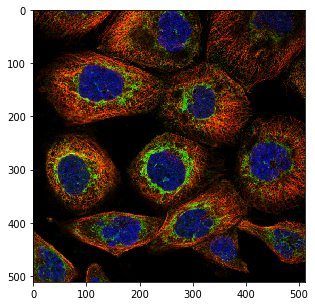

In [154]:
# Plot RGB full color image
plt.figure(figsize=(5,5))
plt.imshow(rgb);

### One-hot Encoding Labels:

In [12]:
class_dict = {
    '0': "Nucleoplasm",
    '1': "Nuclear membrane",
    '2': "Nucleoli",
    '3': "Nucleoli fibrillar center",
    '4': "Nuclear speckles",
    '5': "Nuclear bodies",
    '6': "Endoplasmic reticulum",
    '7': "Golgi apparatus",
    '8': "Peroxisomes",
    '9': "Endosomes",
    '10': "Lysosomes",
    '11': "Intermediate filaments",
    '12': "Actin filaments",
    '13': "Focal adhesion sites",
    '14': "Microtubules",
    '15': "Microtubule ends",
    '16': "Cytokinetic bridge",
    '17': "Mitotic spindle",
    '18': "Microtubule organizing center",
    '19': "Centrosome",
    '20': "Lipid droplets",
    '21': "Plasma membrane",
    '22': "Cell junctions",
    '23': "Mitochondria",
    '24': "Aggresome",
    '25': "Cytosol",
    '26': "Cytoplasmic bodies",
    '27': "Rods & rings"
}

### Split Target String into Separate Labels

Example of raw value in Target:

In [13]:
df.loc[0, 'Target']

'16 0'

Split target from single string into a list of target proteins

In [14]:
df['split_target'] = [x.split() for x in df['Target']]

In [15]:
df.head(2)

,Id,Target,split_target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]"


### One Hot Encoding

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

In [17]:
# One hot encode labels
mlb = MultiLabelBinarizer()
dum_df = df.join(pd.DataFrame(mlb.fit_transform(df['split_target']),
                          columns=mlb.classes_,
                          index=df.index))

In [18]:
dum_df.head(2)

,Id,Target,split_target,0,1,10,11,12,13,14,...,25,26,27,3,4,5,6,7,8,9
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]",1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Rename columns to the true label name

In [19]:
dum_df.rename(mapper=class_dict, axis=1, inplace=True)

In [20]:
dum_df.head(2)

,Id,Target,split_target,Nucleoplasm,Nuclear membrane,Lysosomes,Intermediate filaments,Actin filaments,Focal adhesion sites,Microtubules,...,Cytosol,Cytoplasmic bodies,Rods & rings,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,Peroxisomes,Endosomes
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]",1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Get frequency of each label in training data
protein_freq = dum_df.sum(axis=0, numeric_only=True)

# Sort
protein_freq.sort_values(inplace=True, ascending=False)

# Number of images in training set
img_total = dum_df.shape[0]

# Calculate percent
freq_rate = protein_freq/img_total * 100

### Protein Frequency Plot:

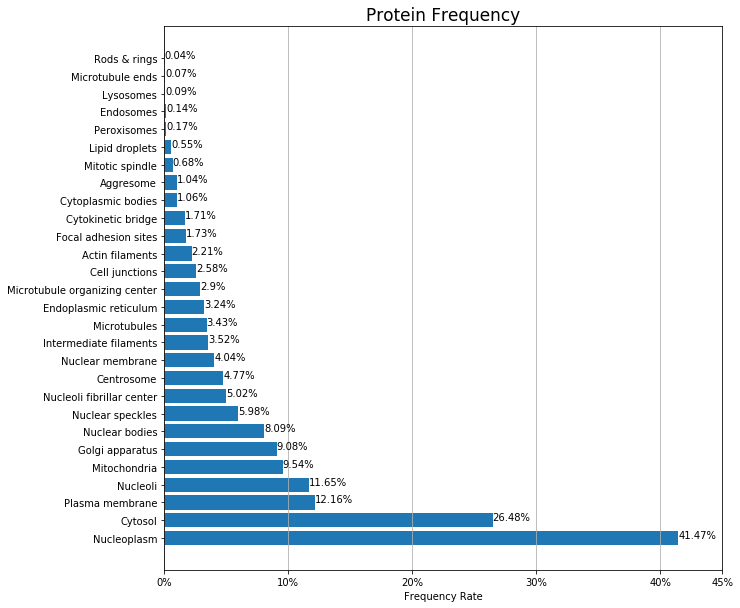

In [22]:
plt.figure(figsize=(10,10))

plt.barh(freq_rate.index, freq_rate.values)

plt.title('Protein Frequency', fontsize=17)

plt.xlabel('Frequency Rate')
plt.xticks([0, 10, 20, 30, 40, 45], labels=['0%', '10%', '20%', '30%', '40%', '45%'])

plt.grid(axis='x')

i = 0
for protein in freq_rate.index:
    annot = str(round(freq_rate.values[i], 2)) + '%'
    plt.annotate(annot, [freq_rate.values[i], protein])
    i += 1

# Exploring Correlations Between Proteins:

In [23]:
import seaborn as sns

In [24]:
protein_freq = protein_freq.to_frame()

In [25]:
labels = dum_df.iloc[:,3:]
label_corr = labels.corr()

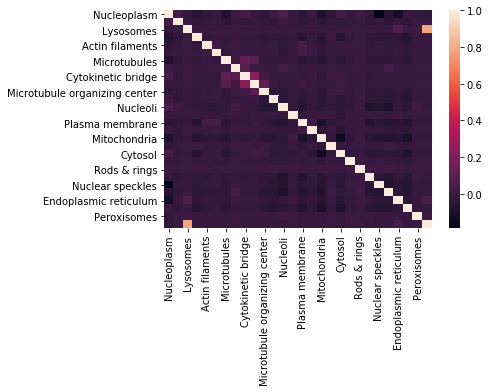

In [26]:
sns.heatmap(label_corr, annot=False);

In [29]:
print('Correlations to note:')
print(round(label_corr.loc['Lysosomes', 'Endosomes'], 3),
      ' Lysosomes & Endosomes')

print(round(label_corr.loc['Cytokinetic bridge', 'Mitotic spindle'], 3),
      ' Cytokinetic bridge & Mitotic spindle')

print(round(label_corr.loc['Cytokinetic bridge', 'Microtubules'], 3),
      ' Cytokinetic bridge & Microtubules')

print(round(label_corr.loc['Cytokinetic bridge', 'Microtubule ends'], 3),
      ' Cytokinetic bridge & Microtubule ends')

Correlations to note:
0.789  Lysosomes & Endosomes
0.223  Cytokinetic bridge & Mitotic spindle
0.114  Cytokinetic bridge & Microtubules
0.083  Cytokinetic bridge & Microtubule ends


The Cytokinetic bridge appears to correlate with several other proteins. Keep in mind, the Cytokinetic bridge only occurs in 1.71% of the images. <br>

The Lysosomes & Endosomes are strongly correlated, but occur in less than 0.15% of the images <br>

### Save Cleaned DataFrame as a .csv

In [161]:
# Drop out unneeded parts of df
clean_df = dum_df.drop(columns='split_target')

In [164]:
## Save as clean_train.csv
# clean_df.to_csv('../protein_data/all/clean_train.csv', index=False)

<hr>

<br>